## Factor Analysis

In [1]:
# Numerical calculation library.

import numpy as np
import pandas as pd

# Visualization library.

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the dummy data.

import urllib.request

url = 'https://raw.githubusercontent.com/yumi-ito/sample_data/master/subject_scores.csv'

urllib.request.urlretrieve(url, 'dummy_data.csv')

df = pd.read_csv('dummy_data.csv')
df.head()

,国語,英語,数学,物理,化学,生物,地学,世界史,日本史,経済,地理,倫理
0,49,49,54,54,60,48,56,56,62,52,55,41
1,57,60,48,51,64,60,61,64,67,55,58,54
2,65,68,50,51,54,44,55,59,66,53,61,52
3,55,57,49,51,61,55,58,61,66,53,57,50
4,43,41,45,46,46,33,45,45,56,43,45,31


In [8]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,国語,英語,数学,物理,化学,生物,地学,世界史,日本史,経済,地理,倫理
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
mean,57.578,59.628,52.577,53.584,60.6,51.601,58.561,60.63,65.574,54.576,59.64,49.588
std,8.32293,10.0724,6.19245,5.26466,8.36612,10.6771,7.03703,7.45726,4.31545,5.79584,6.77512,9.0544
min,30,26,33,36,34,16,36,37,52,35,37,23
25%,52,53,48.75,50,55,44,54,56,63,51,55,44
50%,58,60,52,54,61,52,59,61,66,55,60,49
75%,63,66,57,57,66,59,63,66,69,59,64,56
max,86,95,72,69,82,82,77,85,81,71,79,84


array([[<Axes: xlabel='国語', ylabel='国語'>,
        <Axes: xlabel='英語', ylabel='国語'>,
        <Axes: xlabel='数学', ylabel='国語'>,
        <Axes: xlabel='物理', ylabel='国語'>,
        <Axes: xlabel='化学', ylabel='国語'>,
        <Axes: xlabel='生物', ylabel='国語'>,
        <Axes: xlabel='地学', ylabel='国語'>,
        <Axes: xlabel='世界史', ylabel='国語'>,
        <Axes: xlabel='日本史', ylabel='国語'>,
        <Axes: xlabel='経済', ylabel='国語'>,
        <Axes: xlabel='地理', ylabel='国語'>,
        <Axes: xlabel='倫理', ylabel='国語'>],
       [<Axes: xlabel='国語', ylabel='英語'>,
        <Axes: xlabel='英語', ylabel='英語'>,
        <Axes: xlabel='数学', ylabel='英語'>,
        <Axes: xlabel='物理', ylabel='英語'>,
        <Axes: xlabel='化学', ylabel='英語'>,
        <Axes: xlabel='生物', ylabel='英語'>,
        <Axes: xlabel='地学', ylabel='英語'>,
        <Axes: xlabel='世界史', ylabel='英語'>,
        <Axes: xlabel='日本史', ylabel='英語'>,
        <Axes: xlabel='経済', ylabel='英語'>,
        <Axes: xlabel='地理', ylabel='英語'>,
        <Axes: xlabel='倫理', y

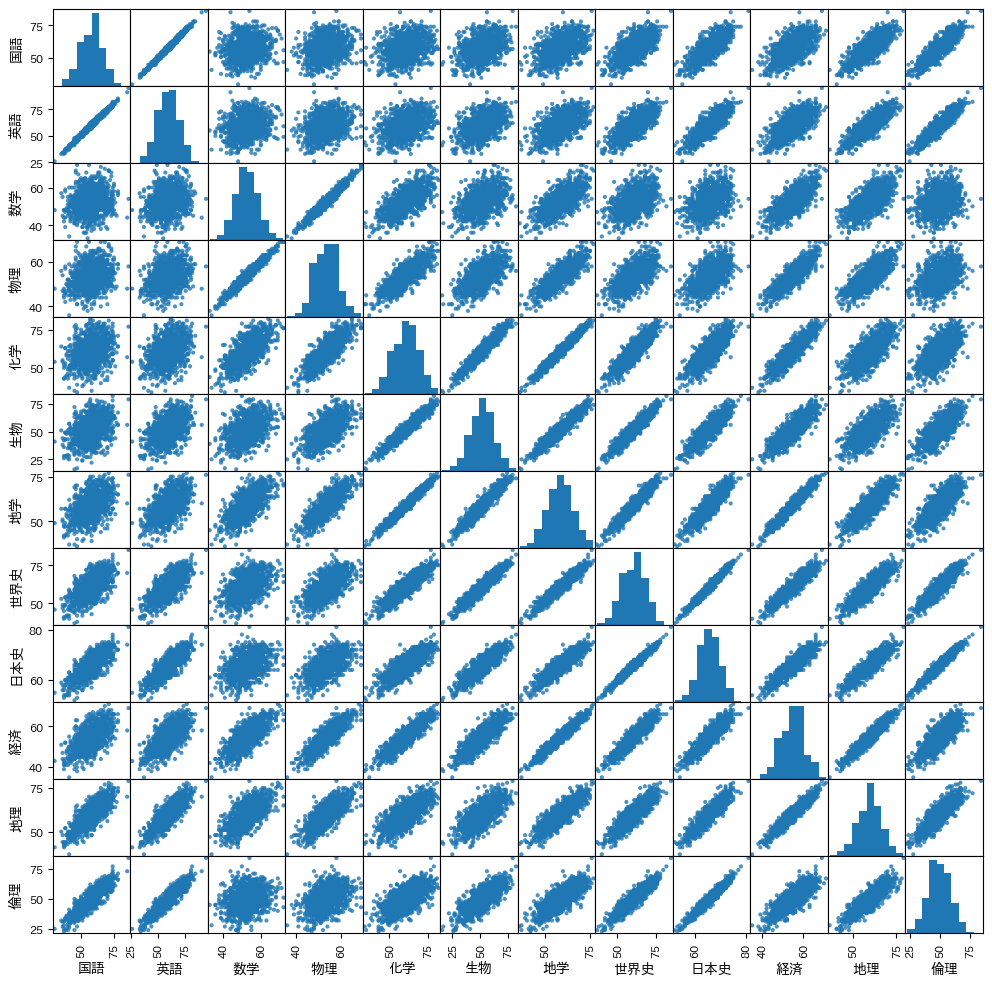

In [22]:
import japanize_matplotlib
from pandas import plotting

# plotting.scatter_matrix(df.iloc[:,:4], figsize=(12, 12), alpha=0.8)
plotting.scatter_matrix(df, figsize=(12, 12), alpha=0.8)

In [30]:
# Import sklearn's standardization modules

from sklearn.preprocessing import StandardScaler

# Create the schemes to translate data.

sc = StandardScaler()
sc.fit(df)

# Translate data

z = sc.transform(df)

z
# z.shape (1000, 12)

array([[-1.0311622 , -1.05568951,  0.229911  , ..., -0.44467875,
        -0.68520102, -0.94896328],
       [-0.06948143,  0.03695112, -0.7394959 , ...,  0.07319246,
        -0.24218312,  0.48752049],
       [ 0.89219933,  0.83159885, -0.41636027, ..., -0.27205501,
         0.20083478,  0.26652299],
       ...,
       [ 1.4932498 ,  1.42758465, -0.25479245, ...,  0.59106368,
         0.93919795,  1.3715105 ],
       [ 3.29640123,  3.11621108, -1.38576717, ...,  0.59106368,
         1.52988849,  2.58699677],
       [-2.71410353, -2.64498498,  0.71461446, ..., -0.61730249,
        -1.42356419, -1.94345204]])

In [37]:
# Import the sklearn FactorAnalysis class.

from sklearn.decomposition import FactorAnalysis as FA

# Decide the number of analysis.

n_components = 3

# Execute the factor analysis.

fa = FA(n_components, max_iter=5000) # Define the model.
fitted = fa.fit_transform(z) # Process fit and transform together.

fitted

array([[-0.6705818 , -0.90529972,  0.23116072],
       [ 0.27219313, -0.17166869, -1.46040494],
       [-0.05808444,  1.40178149,  0.43144979],
       ...,
       [ 0.97637537,  1.16922934, -0.40674828],
       [ 1.49290395,  3.41275196, -0.88995801],
       [-1.21789602, -2.79718726,  0.02309828]])

In [40]:
Factor_loading_matrix = fa.components_.T

# Translate the dataframe.

Factor_loading_matrix = pd.DataFrame(Factor_loading_matrix,
                                     columns=['First factor', 'Second factor', 'Third factor'],
                                     index=[df.columns])
Factor_loading_matrix

,First factor,Second factor,Third factor
国語,0.742494,0.660333,0.106680
英語,0.809237,0.582365,0.071908
数学,0.555028,-0.485400,0.673965
物理,0.705315,-0.479077,0.519653
化学,0.854549,-0.512713,-0.075076
生物,0.878975,-0.358658,-0.312993
地学,0.940102,-0.338218,0.002551
世界史,0.982309,-0.088080,-0.160289
日本史,0.985873,0.082731,-0.129955
経済,0.961655,-0.178404,0.201633


Factor loading refers to the influential ratio to each variable by common factors. The point is as follows, 

1. The absolute values of factor loading.
2. Plus or minus of factor loading.